In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\DELL\Desktop\MINOR PROJECT\ARP Poison,flood attack Dataset.csv")
df

,switch_id,in_port,outport,src_mac_addr(eth),src_mac_addr(arp),dst_mac_addr(eth),dst_mac_addr(arp),src_ip(arp),dst_ip(arp),op_code(arp),packet_in_count,Protocol,Pkt loss,rtt (avg),total_time,Label
0,5,1,4294967291,00:00:00:00:00:07,00:00:00:00:00:07,ff:ff:ff:ff:ff:ff,00:00:00:00:00:00,10.0.0.7,10.0.0.12,1,1707,0,0,0.0,306446,0
1,2,3,4294967291,00:00:00:00:00:07,00:00:00:00:00:07,ff:ff:ff:ff:ff:ff,00:00:00:00:00:00,10.0.0.7,10.0.0.12,1,1708,0,0,0.0,306446,0
2,4,4,4294967291,00:00:00:00:00:07,00:00:00:00:00:07,ff:ff:ff:ff:ff:ff,00:00:00:00:00:00,10.0.0.7,10.0.0.12,1,1709,0,0,0.0,306446,0
3,3,4,4294967291,00:00:00:00:00:07,00:00:00:00:00:07,ff:ff:ff:ff:ff:ff,00:00:00:00:00:00,10.0.0.7,10.0.0.12,1,1710,0,0,0.0,306446,0
4,1,1,4294967291,00:00:00:00:00:07,00:00:00:00:00:07,ff:ff:ff:ff:ff:ff,00:00:00:00:00:00,10.0.0.7,10.0.0.12,1,1711,0,0,0.0,306446,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133995,2,1,4294967291,52:a8:8f:d6:f1:c5,f1:c7:f5:b5:82:57,ff:ff:ff:ff:ff:ff,00:00:00:00:00:00,20.43.47.187,10.0.0.2,1,96539,0,100,0.0,1028649,2
133996,11,4,4294967291,53:aa:b3:59:5b:9d,3e:22:e6:34:53:79,ff:ff:ff:ff:ff:ff,00:00:00:00:00:00,83.60.24.35,10.0.0.2,1,96540,0,100,0.0,1028649,2
133997,13,4,4294967291,71:12:2d:65:56:f1,da:4c:4a:76:d8:db,ff:ff:ff:ff:ff:ff,00:00:00:00:00:00,130.118.245.13,10.0.0.2,1,96541,0,100,0.0,1028649,2
133998,12,4,4294967291,71:12:2d:65:56:f1,da:4c:4a:76:d8:db,ff:ff:ff:ff:ff:ff,00:00:00:00:00:00,130.118.245.13,10.0.0.2,1,96542,0,100,0.0,1028649,2


In [3]:

df["Label"].value_counts()

Label
2    92138
0    33694
1     8168
Name: count, dtype: int64

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.isnull().sum()

switch_id              0
in_port                0
outport                0
src_mac_addr(eth)      0
src_mac_addr(arp)    532
dst_mac_addr(eth)      0
dst_mac_addr(arp)    533
src_ip(arp)            0
dst_ip(arp)            0
op_code(arp)           0
packet_in_count        0
Protocol               0
Pkt loss               0
rtt (avg)              0
total_time             0
Label                  0
dtype: int64

In [6]:
df.dropna(inplace=True)
df.isnull().sum()

switch_id            0
in_port              0
outport              0
src_mac_addr(eth)    0
src_mac_addr(arp)    0
dst_mac_addr(eth)    0
dst_mac_addr(arp)    0
src_ip(arp)          0
dst_ip(arp)          0
op_code(arp)         0
packet_in_count      0
Protocol             0
Pkt loss             0
rtt (avg)            0
total_time           0
Label                0
dtype: int64

In [7]:
for i in df.columns:
  print(i,len(df[i].unique()))

switch_id 13
in_port 4
outport 5
src_mac_addr(eth) 7337
src_mac_addr(arp) 7337
dst_mac_addr(eth) 28
dst_mac_addr(arp) 27
src_ip(arp) 7332
dst_ip(arp) 21
op_code(arp) 3
packet_in_count 92846
Protocol 2
Pkt loss 2
rtt (avg) 5
total_time 74
Label 3


In [8]:
y=df.iloc[:,len(df.columns)-1]
print(y.value_counts())
y=pd.get_dummies(y)
y.replace(to_replace=True,value=1,inplace=True)
y.replace(to_replace=False,value=0,inplace=True)


Label
2    92138
0    33320
1     8009
Name: count, dtype: int64


In [9]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

columns=["outport","src_mac_addr(eth)",	"src_mac_addr(arp)","dst_mac_addr(eth)","dst_mac_addr(arp)","src_ip(arp)","dst_ip(arp)","total_time"]
for attr in columns:
    df[attr]= label_encoder.fit_transform(df[attr])

df.shape

(133467, 16)

In [10]:
# Linear
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, hinge_loss



X=df.iloc[:,:len(df.columns)-1]
y=df.iloc[:,len(df.columns)-1]
y=np.array(y)


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

svm= LinearSVC(loss="hinge",multi_class="crammer_singer") 
    

svm.fit(X_train,y_train)

y_pred=svm.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

# print(y_test.shape)
# print(y_pred.shape)

# # hinge=hinge_loss(y_test,y_pred)
# print("Loss:",hinge_loss)



C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy: 0.9408356434654479


C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [11]:
y_test

array([2, 2, 0, ..., 0, 2, 2], dtype=int64)

In [12]:
y_pred

array([2, 2, 0, ..., 0, 2, 2], dtype=int64)

In [13]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,hinge_loss
import matplotlib.pyplot as plt

accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)


# Classification report
print("Classification Report :")
print(classification_report(y_test, y_pred))

print("Confusion Matrix :")
cm=confusion_matrix(y_test, y_pred)
print(cm)


Accuracy: 0.9408356434654479
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10069
           1       1.00      0.00      0.01      2374
           2       0.92      1.00      0.96     27598

    accuracy                           0.94     40041
   macro avg       0.97      0.67      0.65     40041
weighted avg       0.95      0.94      0.91     40041

Confusion Matrix :
[[10069     0     0]
 [    0     6  2368]
 [    1     0 27597]]


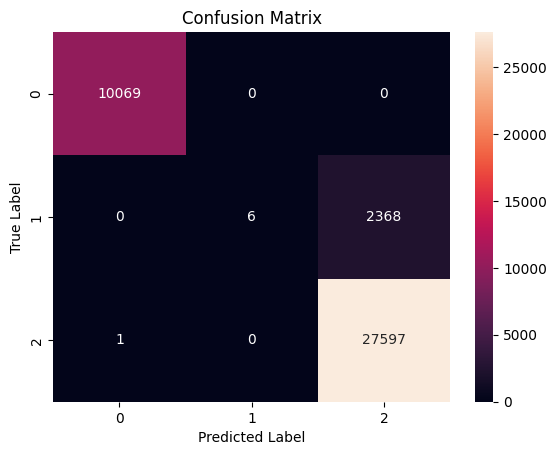

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

labels = ['0','1','2']

sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()    


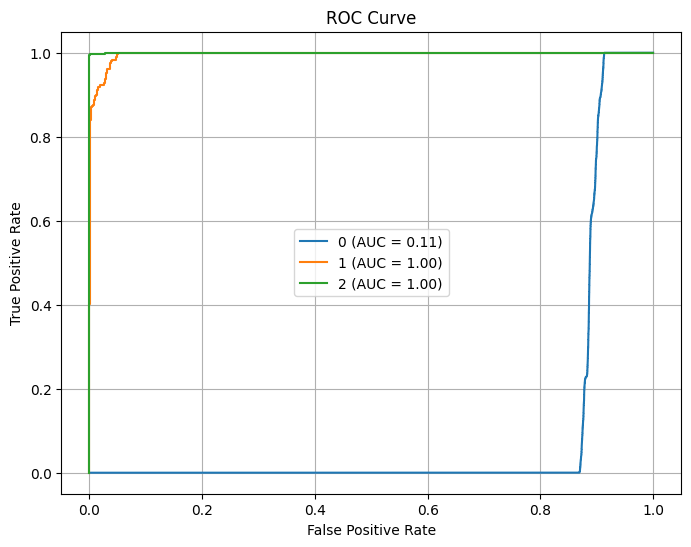

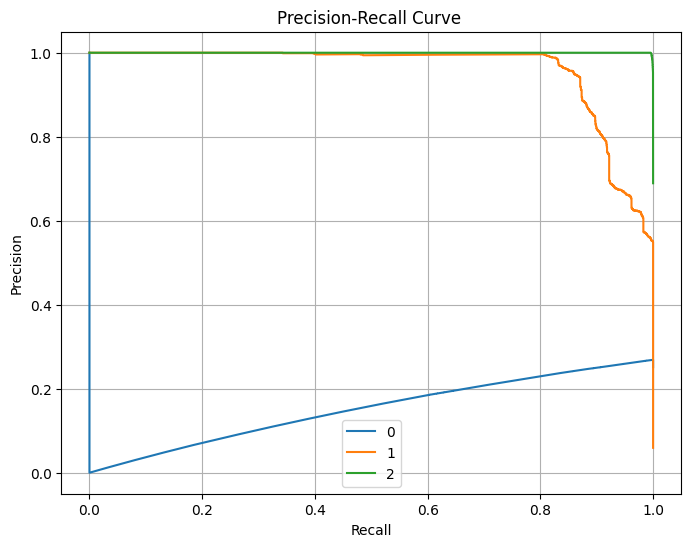

Matthews Correlation Coefficient : 0.8708041422997078


In [15]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, matthews_corrcoef
import matplotlib.pyplot as plt

# ROC curve

plt.figure(figsize=(8, 6))
for i in range(len(df["Label"].unique())):
    fpr, tpr, _ = roc_curve((y_test == i).astype(int), svm.decision_function(X_test)[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{df["Label"].unique()[i]} (AUC = {roc_auc:.2f})')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


# Precision-Recall curve
plt.figure(figsize=(8, 6))
for i in range(len(df["Label"].unique())):
    precision, recall, _ = precision_recall_curve((y_test == i).astype(int), svm.decision_function(X_test)[:, i])
    plt.plot(recall, precision, label=f'{df["Label"].unique()[i]}')

plt.title('Precision-Recall Curve ')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.show()


# Matthews correlation coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)

print("Matthews Correlation Coefficient :", mcc)


In [16]:
# import numpy as np
# from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve, matthews_corrcoef, accuracy_score, hinge_loss
# import matplotlib.pyplot as plt
# from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
# from sklearn.svm import SVC
# # from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split


# x=df.iloc[:,:len(df.columns)-1]
# X=x
# y=df.iloc[:,len(df.columns)-1]
# y=np.array(y)


# # Split dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # One-vs-One (OvO) classification
# ovo_clf = OneVsOneClassifier(SVC())
# ovo_clf.fit(X_train, y_train)

# # One-vs-All (OvA) classification
# ova_clf = OneVsRestClassifier(SVC())
# ova_clf.fit(X_train, y_train)

# # Prediction
# y_pred_ovo = ovo_clf.predict(X_test)
# y_pred_ova = ova_clf.predict(X_test)

# # Accuracy
# accuracy_ovo = accuracy_score(y_test, y_pred_ovo)
# accuracy_ova = accuracy_score(y_test, y_pred_ova)

# print("Accuracy for One-vs-One (OvO):", accuracy_ovo)
# print("Accuracy for One-vs-All (OvA):", accuracy_ova)

# # # Hinge Loss
# # hinge_loss_ovo = hinge_loss(y_test, y_pred_ovo)
# # hinge_loss_ova = hinge_loss(y_test, y_pred_ova)

# # print("Hinge Loss for One-vs-One (OvO):", hinge_loss_ovo)
# # print("Hinge Loss for One-vs-All (OvA):", hinge_loss_ova)

# # Classification report
# print("Classification Report for One-vs-One (OvO):")
# print(classification_report(y_test, y_pred_ovo))
# print("Classification Report for One-vs-All (OvA):")
# print(classification_report(y_test, y_pred_ova))

# # ROC curve
# plt.figure(figsize=(8, 6))
# for i in range(len(df["Label"].unique())):
#     fpr, tpr, _ = roc_curve((y_test == i).astype(int), ovo_clf.decision_function(X_test)[:, i])
#     roc_auc = auc(fpr, tpr)
#     plt.plot(fpr, tpr, label=f'{df["Label"].unique()[i]} (AUC = {roc_auc:.2f})')

# plt.title('ROC Curve for One-vs-One (OvO)')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.legend()
# plt.grid()
# plt.show()

# plt.figure(figsize=(8, 6))
# for i in range(len(df["Label"].unique())):
#     fpr, tpr, _ = roc_curve((y_test == i).astype(int), ova_clf.decision_function(X_test)[:, i])
#     roc_auc = auc(fpr, tpr)
#     plt.plot(fpr, tpr, label=f'{df["Label"].unique()[i]} (AUC = {roc_auc:.2f})')

# plt.title('ROC Curve for One-vs-All (OvA)')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.legend()
# plt.grid()
# plt.show()

# # Precision-Recall curve
# plt.figure(figsize=(8, 6))
# for i in range(len(df["Label"].unique())):
#     precision, recall, _ = precision_recall_curve((y_test == i).astype(int), ovo_clf.decision_function(X_test)[:, i])
#     plt.plot(recall, precision, label=f'{df["Label"].unique()[i]}')

# plt.title('Precision-Recall Curve for One-vs-One (OvO)')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.legend()
# plt.grid()
# plt.show()

# plt.figure(figsize=(8, 6))
# for i in range(len(df["Label"].unique())):
#     precision, recall, _ = precision_recall_curve((y_test == i).astype(int), ova_clf.decision_function(X_test)[:, i])
#     plt.plot(recall, precision, label=f'{df["Label"].unique()[i]}')

# plt.title('Precision-Recall Curve for One-vs-All (OvA)')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.legend()
# plt.grid()
# plt.show()

# # Matthews correlation coefficient (MCC)
# mcc_ovo = matthews_corrcoef(y_test, y_pred_ovo)
# mcc_ova = matthews_corrcoef(y_test, y_pred_ova)
# print("Matthews Correlation Coefficient for One-vs-One (OvO):", mcc_ovo)
# print("Matthews Correlation Coefficient for One-vs-All (OvA):", mcc_ova)


In [17]:

# from sklearn.metrics import hinge_loss



# def hinge_loss_ovo(clf, X, y):
#     n_samples = len(X)
#     total_loss = 0.0
    
#     for i in range(n_samples):
#         for j in range(i+1, n_samples):
#             if y[i] == y[j]:
#                 continue
#             y_ij = 1 if y[i] < y[j] else -1
#             decision = clf.decision_function([X[i], X[j]])
#             loss = max(0, 1 - y_ij * decision[0][0]) + max(0, 1 - y_ij * decision[1][0])
#             total_loss += loss
    
#     return total_loss

# def hinge_loss_ova(clf, X, y):
#     n_samples = len(X)
#     total_loss = 0.0
    
#     for i in range(len(clf.estimators_)):
#         for j in range(n_samples):
#             y_true = 1 if y[j] == i else -1
#             decision = clf.estimators_[i].decision_function([X[j]])
#             loss = max(0, 1 - y_true * decision[0][0])
#             total_loss += loss
    
#     return total_loss

# hinge_loss_ovo_value = hinge_loss_ovo(ovo_clf, X_test, y_test)
# hinge_loss_ova_value = hinge_loss_ova(ova_clf, X_test, y_test)

# print("Hinge Loss (OvO):", hinge_loss_ovo_value)
# print("Hinge Loss (OvA):", hinge_loss_ova_value)


In [18]:
# rbf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


X=df.iloc[:,:len(df.columns)-1]
y=df.iloc[:,len(df.columns)-1]
y=np.array(y)


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

svm=SVC(kernel='rbf',C=1.0,random_state=42)

svm.fit(X_train,y_train)

y_pred=svm.predict(X_test)


In [19]:
# rbf
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,hinge_loss

accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

# loss=hinge_loss(y_test,y_pred)
# print("Hinge Loss:",loss)

print("\nClassification Report:\n",classification_report(y_test,y_pred))


cm=confusion_matrix(y_test,y_pred)
print("\nConfusion Matrix:\n",cm)




Accuracy: 0.9400114882245698

Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89     10069
           1       0.00      0.00      0.00      2374
           2       1.00      1.00      1.00     27598

    accuracy                           0.94     40041
   macro avg       0.60      0.67      0.63     40041
weighted avg       0.89      0.94      0.91     40041


Confusion Matrix:
 [[10069     0     0]
 [ 2368     0     6]
 [   28     0 27570]]


C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


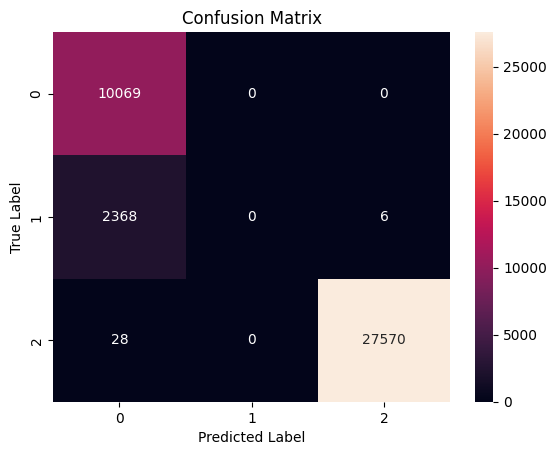

In [20]:
# rbf

import seaborn as sns
import matplotlib.pyplot as plt

labels=["0","1","2"]
sns.heatmap(cm,annot=True,fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()   

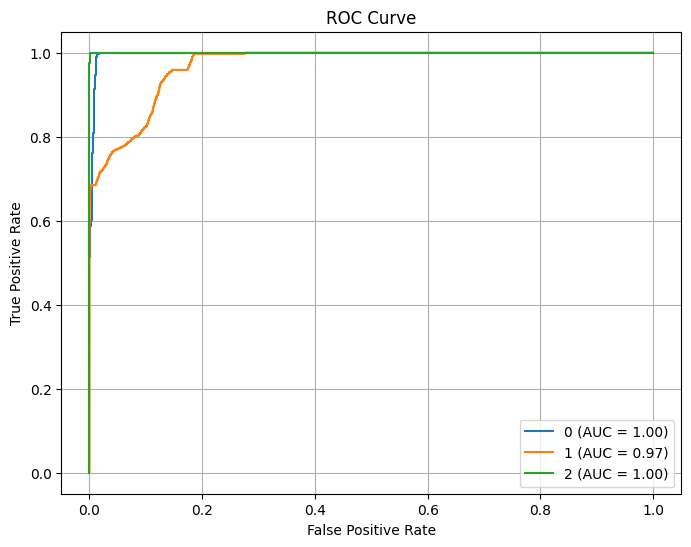

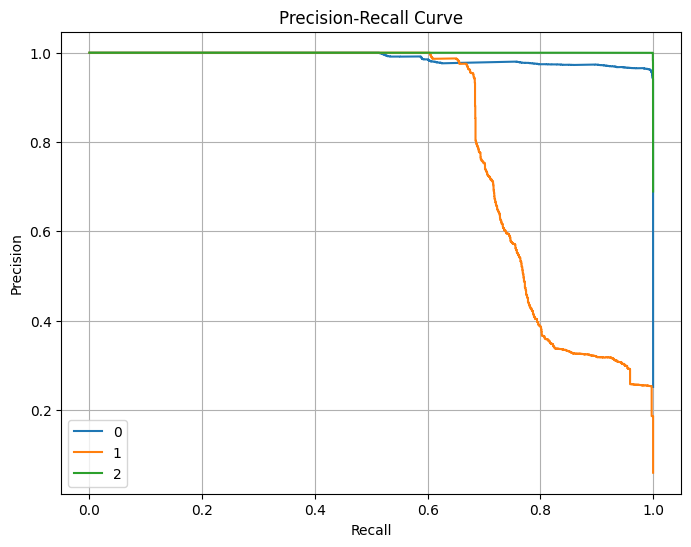

Matthews Correlation Coefficient : 0.8732158858923553


In [21]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, matthews_corrcoef
import matplotlib.pyplot as plt

# ROC curve

plt.figure(figsize=(8, 6))
for i in range(len(df["Label"].unique())):
    fpr, tpr, _ = roc_curve((y_test == i).astype(int), svm.decision_function(X_test)[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{df["Label"].unique()[i]} (AUC = {roc_auc:.2f})')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


# Precision-Recall curve
plt.figure(figsize=(8, 6))
for i in range(len(df["Label"].unique())):
    precision, recall, _ = precision_recall_curve((y_test == i).astype(int), svm.decision_function(X_test)[:, i])
    plt.plot(recall, precision, label=f'{df["Label"].unique()[i]}')

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.show()


# Matthews correlation coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)

print("Matthews Correlation Coefficient :", mcc)
